In [ ]:
pip install alpha_vantage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 15.3 MB/s eta 0:00:00


In [ ]:
## importing all the libraries

## for working with the data frame
import pandas as pd
import numpy as np
from datetime import date

## for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

## for importing of the dataset
from alpha_vantage.timeseries import TimeSeries

## for training the model 
import tensorflow as tf
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score 

## for predicting the accuracy of the regression model
from sklearn.metrics import r2_score


In [ ]:
## importing the dataset using the API key

API_key = '7N58ARN74RCCMY0L'

outputsize = 'compact'
symbol = input('Enter your choice of equity portfolio: ')
typ = input('Data type- "daily", "weekly", "monthly", "interval" : ')
ts = TimeSeries(key = API_key, output_format = 'pandas')
## making the coditions
if typ == 'daily':
  state = ts.get_daily_adjusted(symbol, outputsize=outputsize)[0]
elif typ == 'weekly':
  state = ts.get_weekly_adjusted(symbol)[0]
elif typ == 'monthly':
  state = ts.get_monthly_adjusted(symbol)[0]
elif typ == 'interval':
  interval = input('Interval - 1min, 5min, 15min, 30min, 60min : ')
  state = ts.get_intraday(symbol, interval=interval, outputsize=outputsize)[0]
else:
  print('Wrong Entry')

## displaying the dataset
state.reset_index(inplace = True)
state

Enter your choice of equity portfolio: AAPL
Data type- "daily", "weekly", "monthly", "interval" : weekly


,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount
0,2023-04-19,165.09,168.16,164.03,167.63,167.6300,138356792.0,0.0
1,2023-04-14,161.42,166.32,159.78,165.21,165.2100,263326290.0,0.0
2,2023-04-06,164.27,166.84,161.80,164.66,164.6600,200156349.0,0.0
3,2023-03-31,159.94,165.00,155.98,164.90,164.9000,267939590.0,0.0
4,2023-03-24,155.07,162.14,154.15,160.25,160.2500,350159914.0,0.0
...,...,...,...,...,...,...,...,...
1219,1999-12-10,114.56,118.00,99.00,103.00,0.7826,25152800.0,0.0
1220,1999-12-03,94.25,115.56,93.25,115.00,0.8738,28046300.0,0.0
1221,1999-11-26,91.75,95.50,88.50,95.06,0.7223,9757600.0,0.0
1222,1999-11-19,89.62,94.75,88.06,92.44,0.7024,13711000.0,0.0


In [ ]:

## taking the info about the fundamental data from the given dataset

from alpha_vantage.fundamentaldata import FundamentalData

key = 'I9OE24WDJWG30SN4'

fd = FundamentalData(key, output_format = 'pandas')

data = fd.get_balance_sheet_annual(symbol)
data

(                              fiscalDateEnding reportedCurrency   totalAssets  \
 date                                                                            
 1970-01-01 00:00:00.000000000       2022-09-30              USD  352755000000   
 1970-01-01 00:00:00.000000001       2021-09-30              USD  351002000000   
 1970-01-01 00:00:00.000000002       2020-09-30              USD  323888000000   
 1970-01-01 00:00:00.000000003       2019-09-30              USD  338516000000   
 1970-01-01 00:00:00.000000004       2018-09-30              USD  365725000000   
 
                               totalCurrentAssets  \
 date                                               
 1970-01-01 00:00:00.000000000       135405000000   
 1970-01-01 00:00:00.000000001       134836000000   
 1970-01-01 00:00:00.000000002       143713000000   
 1970-01-01 00:00:00.000000003       162819000000   
 1970-01-01 00:00:00.000000004       131339000000   
 
                               cashAndCashEquivalen

In [ ]:
state.isnull().sum()

## there is no missing values present in the dataframe

date                  0
1. open               0
2. high               0
3. low                0
4. close              0
5. adjusted close     0
6. volume             0
7. dividend amount    0
dtype: int64

## visualizations


In [ ]:
## graph for the opening price
fig = px.line(state, x = state['date'], y = state['1. open'], title='Open price of the given stock')
fig.show()

In [ ]:
## graph for closing price
fig = px.line(state, x = state['date'], y = state['4. close'], title='Close price of the given stock')
fig.show()

In [ ]:
## graph for Highest price of the portfolio
fig = px.line(state, x = state['date'], y = state['2. high'], title='High price of the given stock')
fig.show()

## FINANCIAL INDICATORS

In [ ]:
## finding the moving average
## moving average
window = 50
TS = state['4. close']

ts_moving_avg = TS.rolling(window = window).mean()

In [ ]:
ts_moving_avg

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
1219    79.9704
1220    81.9004
1221    83.4204
1222    84.8242
1223    86.2654
Name: 4. close, Length: 1224, dtype: float64

In [ ]:
## calculating the 50 days moving average of the given ticker

state['Price'] = state['SMA_50'] = state['4. close'].rolling(window=50).mean()
fig = px.line(state, x = state['date'], y = state['Price'], title='50-day SMA', labels={"50-dat SMA"})
fig.update_traces(line = dict(color='green'))
fig.show()

In [ ]:
## calculating the 200 day moving average of the given ticker
state['Price'] = state['SMA_50'] = state['4. close'].rolling(window=200).mean()
fig = px.line(state, x = state['date'], y = state['Price'], title='200-day SMA', labels={"200-dat SMA"})
fig.update_traces(line = dict(color='green'))
fig.show()

In [ ]:
## plotting the EXPONENTIAL MOVING AVERAGE GRAPH(EMA)

state['Price'] = state['EMA_50'] = state['4. close'].ewm(span=50, adjust = False).mean()
fig = px.line(state, x = state['date'], y = state['Price'], title='50-day EMA', labels={"50-dat EMA"})
fig.update_traces(line = dict(color='red'))
fig.show()

## CANDLESTICK CHART

In [ ]:
## making the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=state['date'],
                open = state['1. open'],
                high = state['2. high'],
                low = state['3. low'],
                close = state['4. close'])])
fig.show()


In [ ]:
## taking the close values for the evaluation

df = state.reset_index()['4. close']
print(df)

0       167.63
1       165.21
2       164.66
3       164.90
4       160.25
         ...  
1219    103.00
1220    115.00
1221     95.06
1222     92.44
1223     90.62
Name: 4. close, Length: 1224, dtype: float64


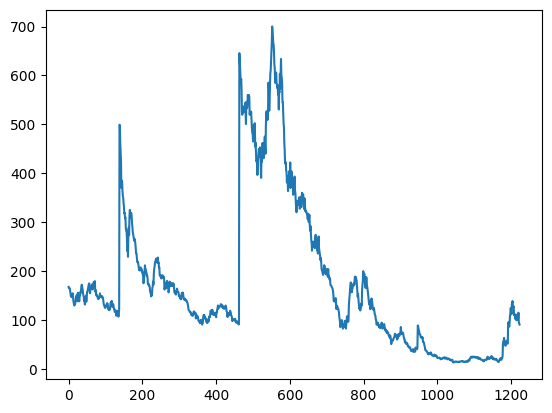

In [ ]:
## plotting the close price of the given stock
plt.plot(df)

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [ ]:
print(df)

[[0.22491357]
 [0.22139088]
 [0.22059027]
 ...
 [0.11927654]
 [0.11546272]
 [0.11281342]]


In [ ]:
## splitting of the dataset
training_size=int(len(df)*0.65)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [ ]:
training_size,test_size

(795, 429)

In [ ]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(694, 100)
(694,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(328, 100)
(328,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
## importing of the tensorflow modules

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## fitting the model
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=35,batch_size=64,verbose=1)

Epoch 1/35
11/11 [==============================] - 1s 135ms/step - loss: 0.0038 - val_loss: 0.0014
Epoch 2/35
11/11 [==============================] - 1s 132ms/step - loss: 0.0037 - val_loss: 0.0012
Epoch 3/35
11/11 [==============================] - 1s 134ms/step - loss: 0.0037 - val_loss: 0.0011
Epoch 4/35
11/11 [==============================] - 2s 187ms/step - loss: 0.0036 - val_loss: 0.0013
Epoch 5/35
11/11 [==============================] - 2s 137ms/step - loss: 0.0035 - val_loss: 0.0016
Epoch 6/35
11/11 [==============================] - 1s 130ms/step - loss: 0.0035 - val_loss: 0.0013
Epoch 7/35
11/11 [==============================] - 1s 131ms/step - loss: 0.0035 - val_loss: 8.4770e-04
Epoch 8/35
11/11 [==============================] - 1s 129ms/step - loss: 0.0032 - val_loss: 0.0013
Epoch 9/35
11/11 [==============================] - 1s 132ms/step - loss: 0.0031 - val_loss: 0.0014
Epoch 10/35
11/11 [==============================] - 1s 132ms/step - loss: 0.0029 - val_loss: 0.

In [ ]:
## prediction of the model
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 26ms/step


In [ ]:
## Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
## on training data
math.sqrt(mean_squared_error(y_train,train_predict))

203501.10777773822

In [ ]:
## on test data
math.sqrt(mean_squared_error(ytest,test_predict))

36967.07289430113

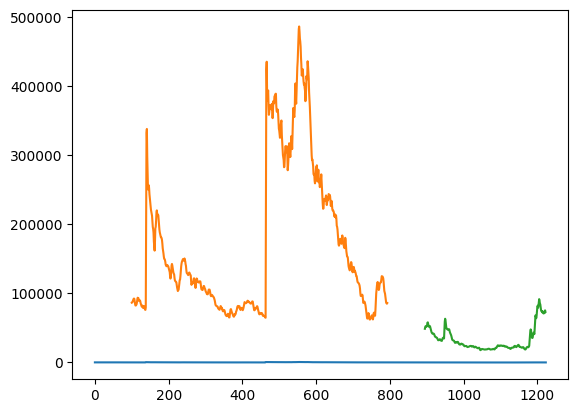

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
## training prediction values
X_train_prediction = model.predict(X_train)
print(X_train)

22/22 [==============================] - 1s 27ms/step
[[[0.22491357]
  [0.22139088]
  [0.22059027]
  ...
  [0.1662797 ]
  [0.16415445]
  [0.1622912 ]]

 [[0.22139088]
  [0.22059027]
  [0.22093963]
  ...
  [0.16415445]
  [0.1622912 ]
  [0.16348484]]

 [[0.22059027]
  [0.22093963]
  [0.21417082]
  ...
  [0.1622912 ]
  [0.16348484]
  [0.16642527]]

 ...

 [[0.26875796]
  [0.28066524]
  [0.28947196]
  ...
  [0.16520252]
  [0.15885585]
  [0.16288802]]

 [[0.28066524]
  [0.28947196]
  [0.2876553 ]
  ...
  [0.15885585]
  [0.16288802]
  [0.15479457]]

 [[0.28947196]
  [0.2876553 ]
  [0.28519233]
  ...
  [0.16288802]
  [0.15479457]
  [0.16232032]]]


In [ ]:
## test dataset prediction value
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

11/11 [==============================] - 0s 25ms/step
[[0.0971778 ]
 [0.09768667]
 [0.09904307]
 [0.10044799]
 [0.10202295]
 [0.10361809]
 [0.10548183]
 [0.10845856]
 [0.11115636]
 [0.11255146]
 [0.11276378]
 [0.11190328]
 [0.11075956]
 [0.10955421]
 [0.10813604]
 [0.10615501]
 [0.10355748]
 [0.10072312]
 [0.09739592]
 [0.09410898]
 [0.09112969]
 [0.08844947]
 [0.08646946]
 [0.08523278]
 [0.08444834]
 [0.08398522]
 [0.08323187]
 [0.08212308]
 [0.08084472]
 [0.0796359 ]
 [0.07833628]
 [0.07700801]
 [0.07592169]
 [0.07493039]
 [0.07372623]
 [0.07221624]
 [0.0707171 ]
 [0.06949922]
 [0.0684237 ]
 [0.06774452]
 [0.06770214]
 [0.06789368]
 [0.06785237]
 [0.06775364]
 [0.06755417]
 [0.06723814]
 [0.06684858]
 [0.06726808]
 [0.06820155]
 [0.06950122]
 [0.0709447 ]
 [0.07203285]
 [0.07287847]
 [0.07812593]
 [0.08724478]
 [0.09763597]
 [0.10693876]
 [0.11334315]
 [0.11617931]
 [0.11601462]
 [0.11381951]
 [0.1101705 ]
 [0.10598948]
 [0.10219678]
 [0.09931713]
 [0.09725421]
 [0.09615245]
 [0.0949

In [ ]:
## calculating the r2 score for the LSTM model
training_data_accuracy = r2_score(y_train, X_train_prediction)
print(training_data_accuracy*100)

92.2354521352632
